#### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import(
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    GridSearchCV,
    train_test_split,
)

#### Load the dataset

In [ ]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.value_counts() / len(y)

0    0.627417
1    0.372583
Name: count, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

#### K-Fold Cross-Validation

In [ ]:
logit = LogisticRegression(penalty='l2', C=1, solver='liblinear', random_state=42, max_iter=10000)

param_grid = dict(
    penalty=['l1', 'l2'],
    C=[0.1, 1, 10],
    )

kf = KFold(n_splits=5, shuffle=True, random_state=42)

clf = GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=kf,
    refit=True,
)

search = clf.fit(X_train, y_train)

search.best_params_

{'C': 10, 'penalty': 'l1'}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.919652,0.035033
1,"{'C': 0.1, 'penalty': 'l2'}",0.934684,0.025498
2,"{'C': 1, 'penalty': 'l1'}",0.949778,0.032561
3,"{'C': 1, 'penalty': 'l2'}",0.947215,0.033998
4,"{'C': 10, 'penalty': 'l1'}",0.964810,0.024390
5,"{'C': 10, 'penalty': 'l2'}",0.957247,0.027116


Text(0.5, 0, 'Hyperparameter space')

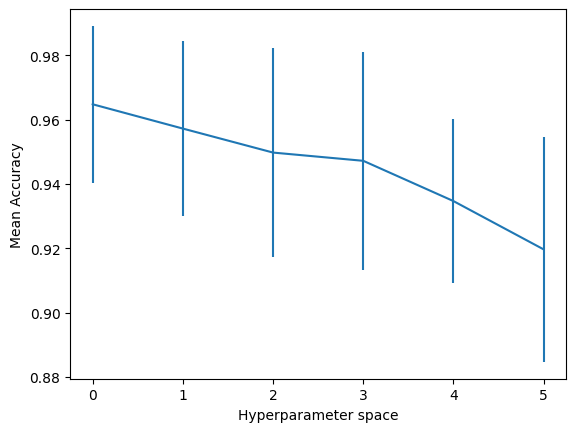

In [ ]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter space')

In [ ]:
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9748743718592965
Test Accuracy:  0.9707602339181286


#### Repeated K-Fold

In [ ]:
logit = LogisticRegression(penalty='l2', C=1, solver='liblinear', random_state=42, max_iter=10000)

param_grid = dict(
    penalty=['l1', 'l2'],
    C=[0.1, 1, 10],
    )

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

clf = GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=rkf,
    refit=True,
)

search = clf.fit(X_train, y_train)

search.best_params_

{'C': 10, 'penalty': 'l1'}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.923620,0.024792
1,"{'C': 0.1, 'penalty': 'l2'}",0.932899,0.022989
2,"{'C': 1, 'penalty': 'l1'}",0.947203,0.026159
3,"{'C': 1, 'penalty': 'l2'}",0.946703,0.026202
4,"{'C': 10, 'penalty': 'l1'}",0.955991,0.025505
5,"{'C': 10, 'penalty': 'l2'}",0.951465,0.024442


Text(0.5, 0, 'Hyperparameter space')

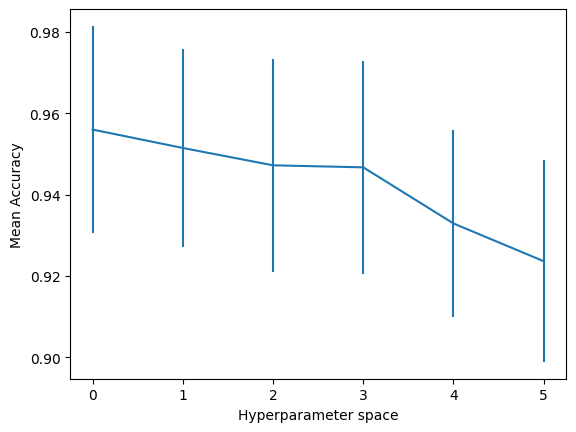

In [ ]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter space')

In [ ]:
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9748743718592965
Test Accuracy:  0.9707602339181286


####Leave One Out

In [ ]:
logit = LogisticRegression(penalty='l2', C=1, solver='liblinear', random_state=42, max_iter=10000)

param_grid = dict(
    penalty=['l1', 'l2'],
    C=[0.1, 1, 10],
    )

loo = LeaveOneOut()

clf = GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=loo,
    refit=True,
)

search = clf.fit(X_train, y_train)

search.best_params_

{'C': 10, 'penalty': 'l1'}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.927136,0.259914
1,"{'C': 0.1, 'penalty': 'l2'}",0.934673,0.247101
2,"{'C': 1, 'penalty': 'l1'}",0.949749,0.218463
3,"{'C': 1, 'penalty': 'l2'}",0.944724,0.228519
4,"{'C': 10, 'penalty': 'l1'}",0.959799,0.196430
5,"{'C': 10, 'penalty': 'l2'}",0.957286,0.202211


Text(0.5, 0, 'Hyperparameter space')

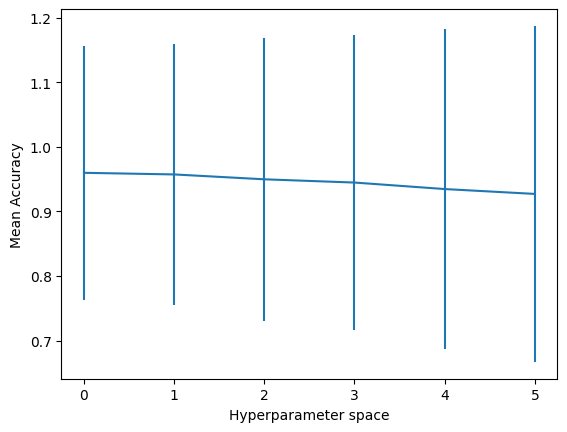

In [ ]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter space')

In [ ]:
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9748743718592965
Test Accuracy:  0.9707602339181286


#### Leave P Out

In [ ]:
logit = LogisticRegression(penalty='l2', C=1, solver='liblinear', random_state=42, max_iter=10000)

param_grid = dict(
    penalty=['l1', 'l2'],
    C=[0.1, 1, 10],
    )

lpo = LeavePOut(p=2)

X_train_small = X_train.head(30)
y_train_small = y_train.head(30)

clf = GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=lpo,
    refit=True,
)

search = clf.fit(X_train_small, y_train_small)

search.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.900000,0.208443
1,"{'C': 0.1, 'penalty': 'l2'}",0.898851,0.209265
2,"{'C': 1, 'penalty': 'l1'}",0.870115,0.226982
3,"{'C': 1, 'penalty': 'l2'}",0.872414,0.225750
4,"{'C': 10, 'penalty': 'l1'}",0.870115,0.226982
5,"{'C': 10, 'penalty': 'l2'}",0.870115,0.226982


Text(0.5, 0, 'Hyperparameter space')

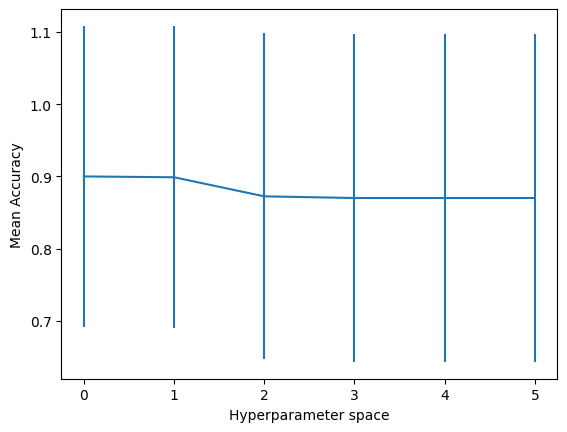

In [ ]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter space')

In [ ]:
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9120603015075377
Test Accuracy:  0.9239766081871345


#### Stratified K-Fold Cross-Validation

In [ ]:
logit = LogisticRegression(penalty='l2', C=1, solver='liblinear', random_state=42, max_iter=10000)

param_grid = dict(
    penalty=['l1', 'l2'],
    C=[0.1, 1, 10],
    )

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

clf = GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=skf,
    refit=True,
)

search = clf.fit(X_train, y_train)

search.best_params_

{'C': 10, 'penalty': 'l1'}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.922089,0.034875
1,"{'C': 0.1, 'penalty': 'l2'}",0.932152,0.024524
2,"{'C': 1, 'penalty': 'l1'}",0.947152,0.016938
3,"{'C': 1, 'penalty': 'l2'}",0.947184,0.014798
4,"{'C': 10, 'penalty': 'l1'}",0.962342,0.013637
5,"{'C': 10, 'penalty': 'l2'}",0.954747,0.010209


Text(0.5, 0, 'Hyperparameter space')

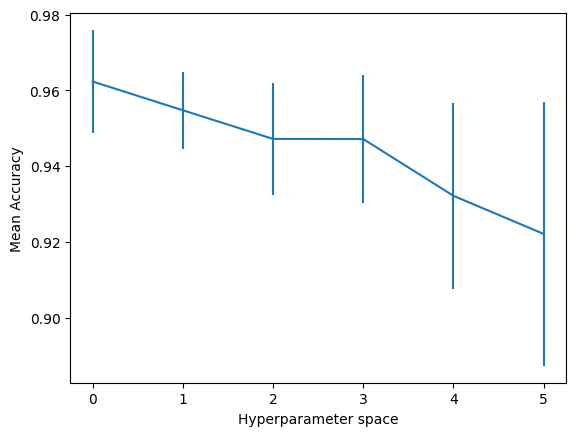

In [ ]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter space')